In [99]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [20]:
df = pd.read_csv('/content/Titanic-Dataset.csv')
df2 = df.copy()

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [16]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [59]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [18]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [48]:
Q1 = df.Age.quantile(0.25)
Q2 = df.Age.quantile(0.50)
Q3 = df.Age.quantile(0.75)
print(Q1, Q2, Q3)

IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(lower_bound, upper_bound)

outliers = df[(df.Age < lower_bound) | (df.Age > upper_bound)]
print(outliers.count())

print(df.Age.mode())

0    24.0
Name: Age, dtype: float64


In [52]:
df2.Age.fillna(df.Age.mean(), inplace=True)
print(df.Age.isnull().sum())
print(df2.Age.isnull().sum())

177
0


/tmp/ipython-input-2431141609.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2.Age.fillna(df.Age.mean(), inplace=True)


<Axes: ylabel='Age'>

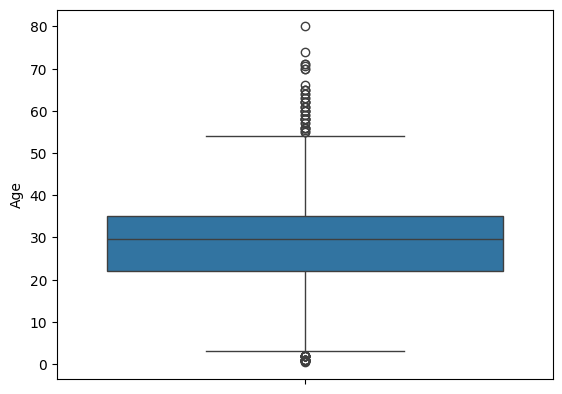

In [69]:
sns.boxplot(df2["Age"])


<Axes: ylabel='Age'>

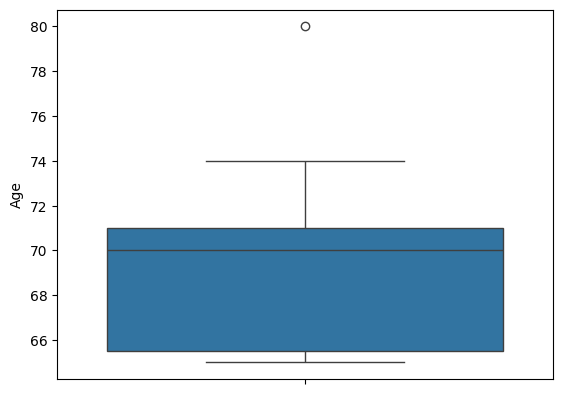

In [70]:
sns.boxplot(df2[(df2.Age <= lower_bound) | (df2.Age >= upper_bound)].Age)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 48.9 KB


<Axes: >

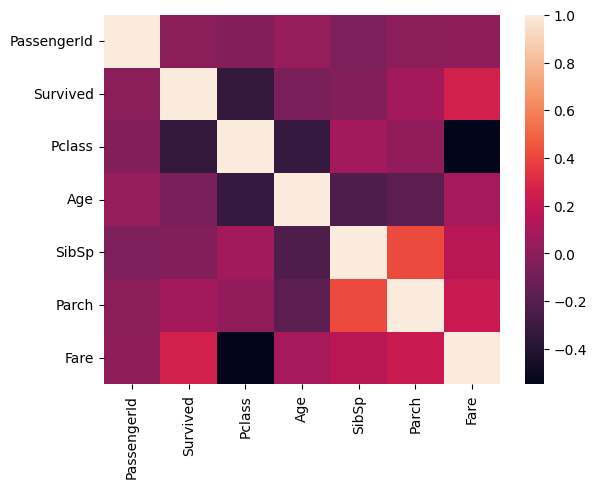

In [95]:
numeric_data = df2.select_dtypes(include=['number'])
numeric_data.info()
sns.heatmap(numeric_data.corr())

<Axes: xlabel='Age', ylabel='Count'>

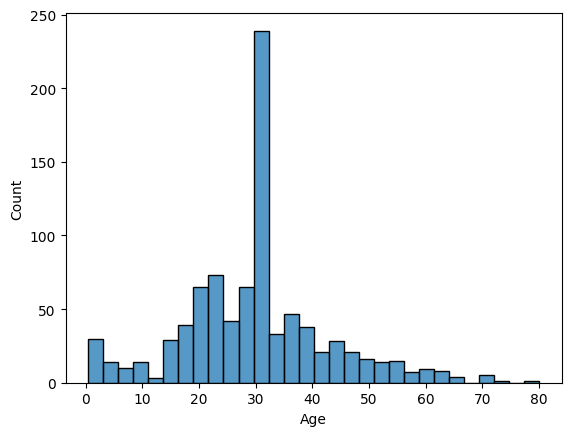

In [78]:
sns.histplot(df2.Age)

<Axes: xlabel='Age', ylabel='Fare'>

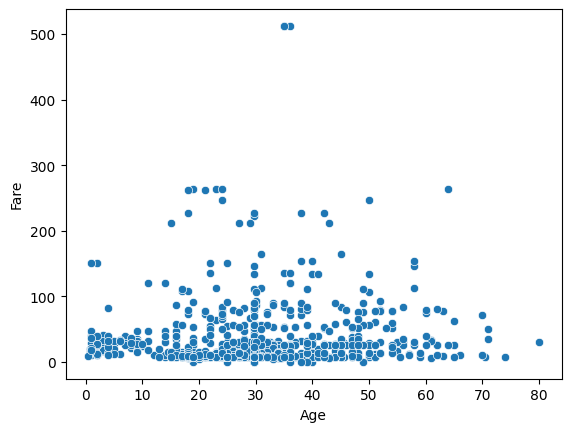

In [84]:
sns.scatterplot(data=df2, x="Age", y="Fare")

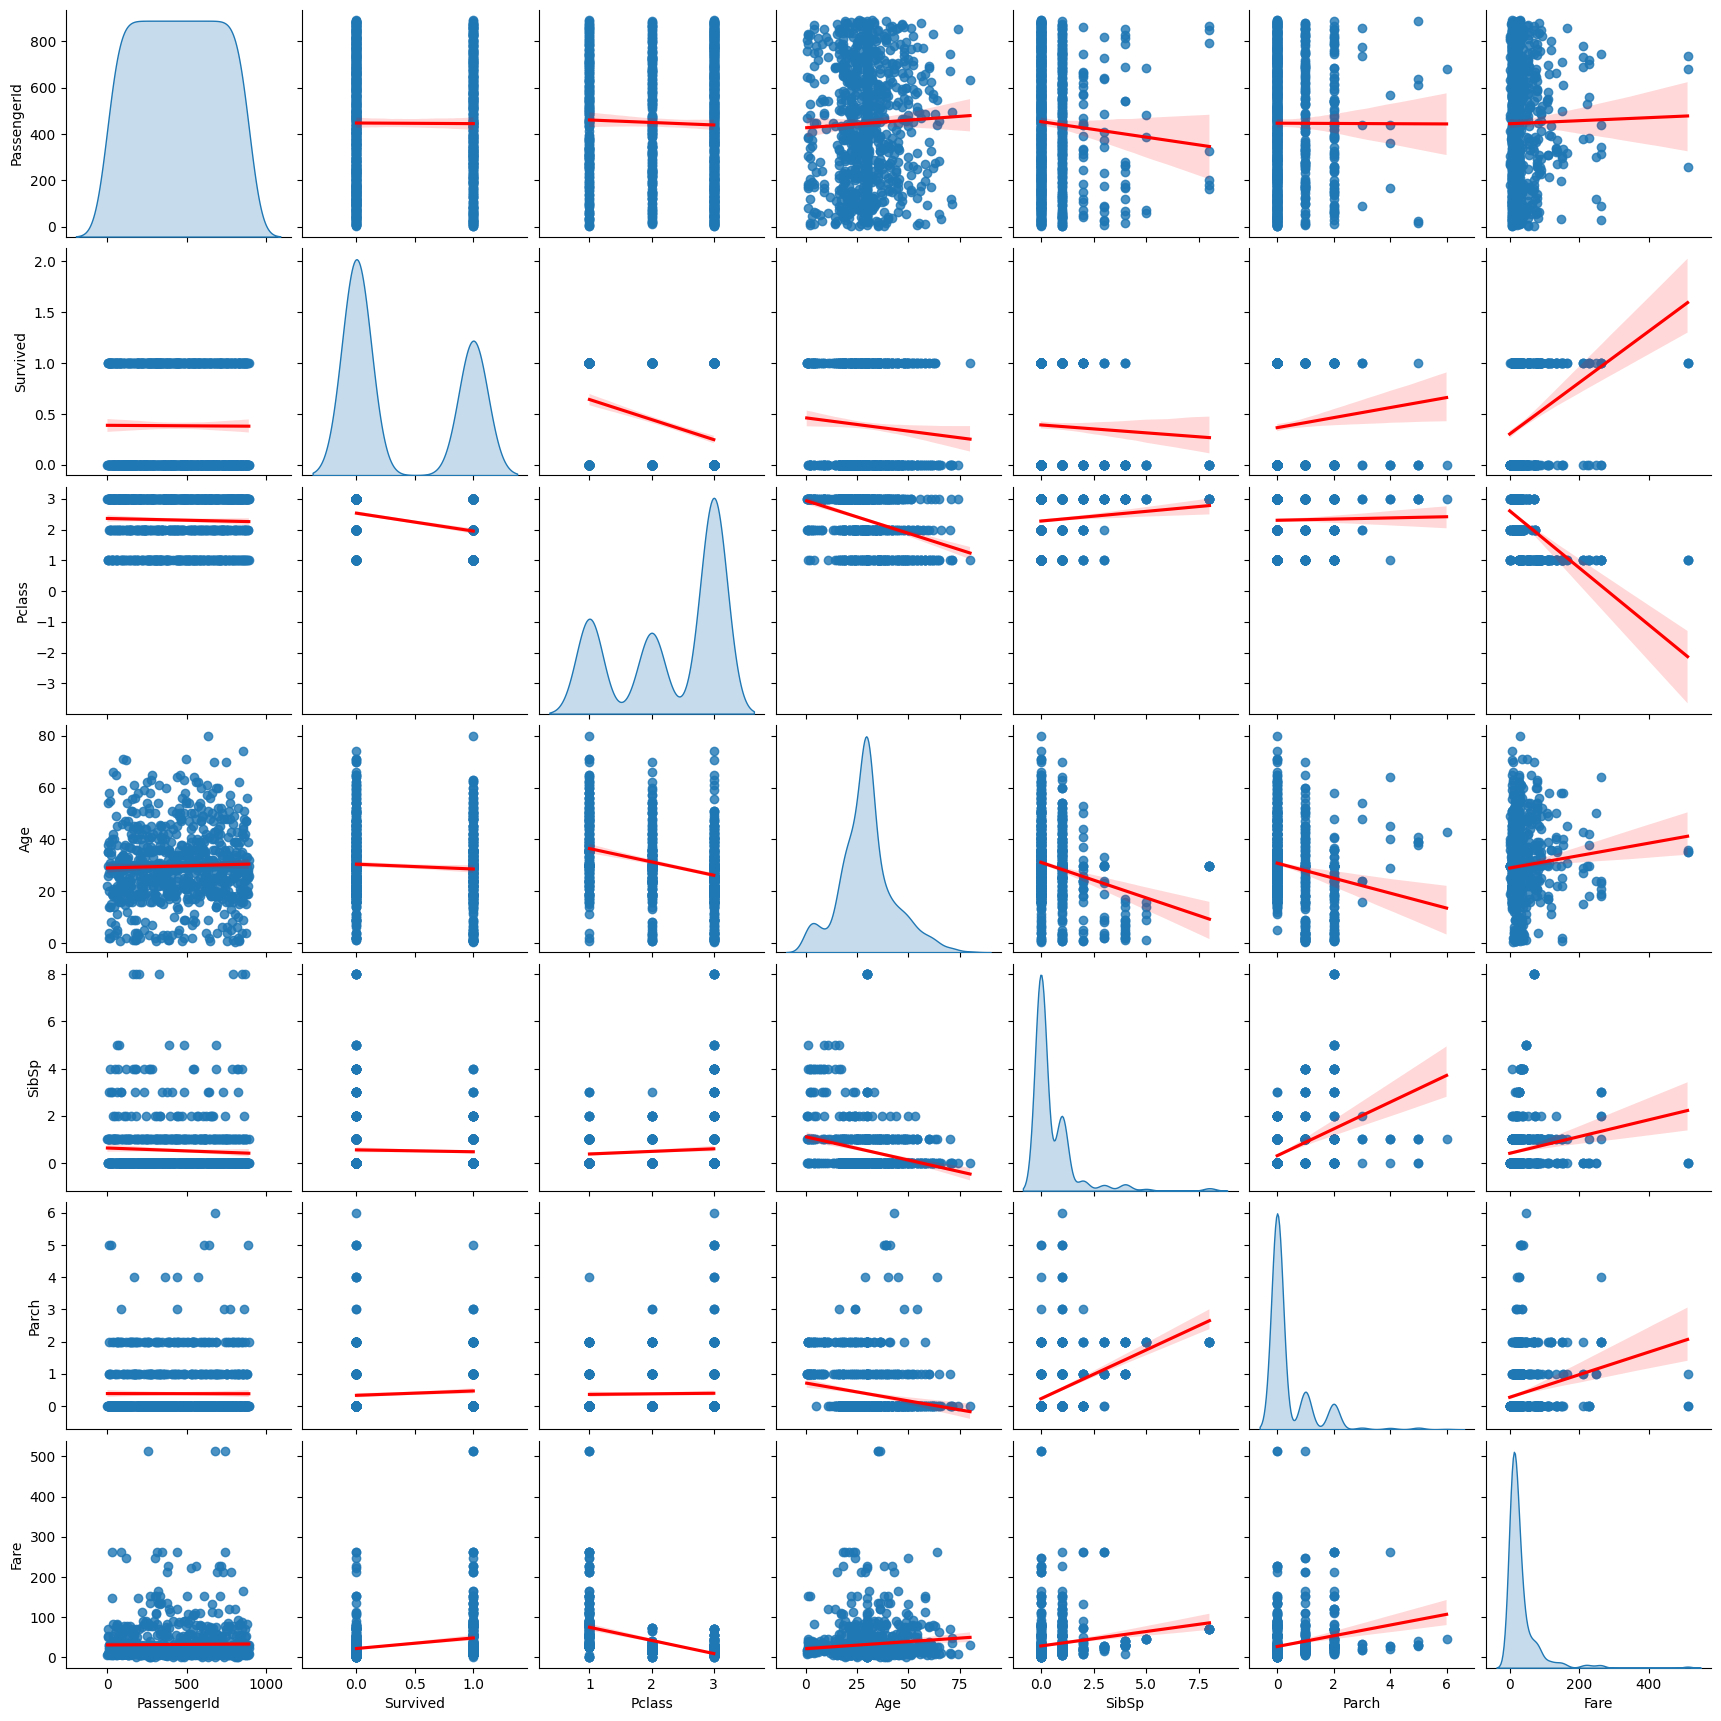

In [91]:
sns.pairplot(numeric_data,diag_kind='kde',kind='reg', plot_kws={'line_kws': {'color': 'red'}})

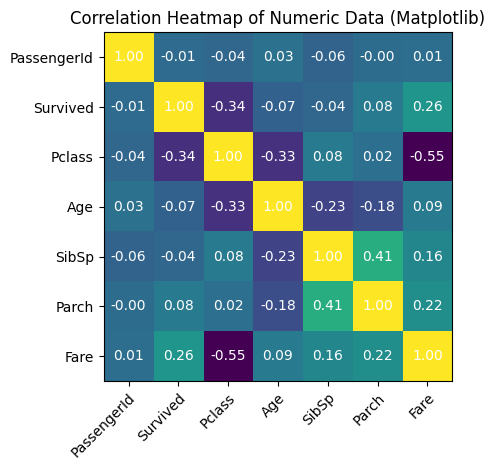

In [83]:
fig, ax = plt.subplots()
im = ax.imshow(numeric_data.corr(), cmap='viridis')

# Show all ticks and label them with the respective column names
ax.set_xticks(range(len(numeric_data.columns)))
ax.set_yticks(range(len(numeric_data.columns)))
ax.set_xticklabels(numeric_data.columns)
ax.set_yticklabels(numeric_data.columns)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(numeric_data.columns)):
    for j in range(len(numeric_data.columns)):
        text = ax.text(j, i, f'{numeric_data.corr().iloc[i, j]:.2f}',
                       ha="center", va="center", color="w")

ax.set_title("Correlation Heatmap of Numeric Data (Matplotlib)")
fig.tight_layout()
plt.show()

<Axes: ylabel='Age'>

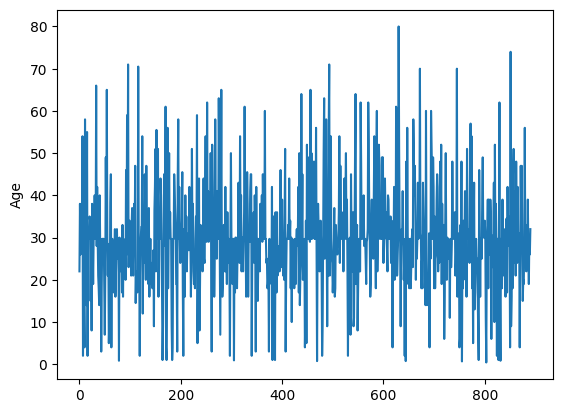

In [92]:
sns.lineplot(df2.Age)

In [97]:
for col in numeric_data:
  df2[f'{col}_smoothen'] = df2[col].rolling(window=5).mean()

<Axes: ylabel='Age'>

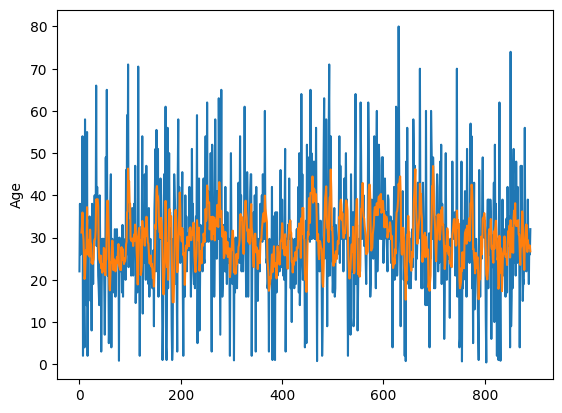

In [98]:
sns.lineplot(df2.Age)
sns.lineplot(df2.Age_smoothen)

In [101]:
for col in numeric_data:
  df2[f'{col}_minmax_scaled'] = MinMaxScaler().fit_transform(df2[[col]])
  df2[f'{col}_standard_scaled'] = StandardScaler().fit_transform(df2[[col]])

<Axes: ylabel='Age_minmax_scaled'>

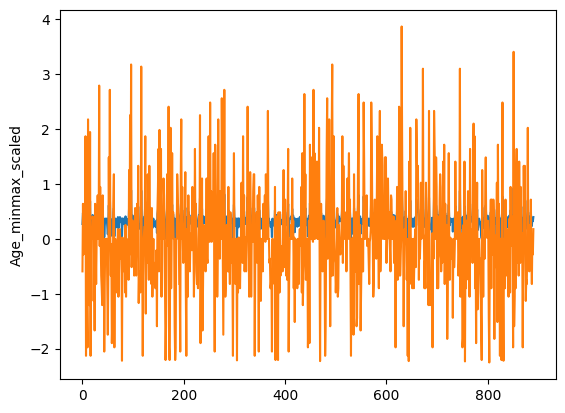

In [102]:
sns.lineplot(df2.Age_minmax_scaled)
sns.lineplot(df2.Age_standard_scaled)

In [103]:
display(numeric_data.corr(method = "pearson"))

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.033207,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,0.033207,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.057527,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


In [108]:
from scipy.stats import chi2_contingency
import itertools

categorical_cols = df.select_dtypes(include='object').columns

chi2_results = {}

for col1, col2 in itertools.combinations(categorical_cols, 2):
    contingency_table = pd.crosstab(df[col1], df[col2])
    chi2, p, dof, ex = chi2_contingency(contingency_table)
    chi2_results[(col1, col2)] = {'p_value': p, 'degrees_of_freedom': dof}

for (col1, col2), results in chi2_results.items():
    print(f"Chi-Square test between '{col1}' and '{col2}':")
    print(f"  P-value: {results['p_value']:.4f}")
    print(f"  Degrees of Freedom: {results['degrees_of_freedom']}")
    print("-" * 30)

Chi-Square test between 'Name' and 'Sex':
  P-value: 0.4842
  Degrees of Freedom: 890
------------------------------
Chi-Square test between 'Name' and 'Ticket':
  P-value: 0.2681
  Degrees of Freedom: 605200
------------------------------
Chi-Square test between 'Name' and 'Cabin':
  P-value: 0.2738
  Degrees of Freedom: 29638
------------------------------
Chi-Square test between 'Name' and 'Embarked':
  P-value: 0.4822
  Degrees of Freedom: 1776
------------------------------
Chi-Square test between 'Sex' and 'Ticket':
  P-value: 0.7146
  Degrees of Freedom: 680
------------------------------
Chi-Square test between 'Sex' and 'Cabin':
  P-value: 0.3814
  Degrees of Freedom: 146
------------------------------
Chi-Square test between 'Sex' and 'Embarked':
  P-value: 0.0013
  Degrees of Freedom: 2
------------------------------
Chi-Square test between 'Ticket' and 'Cabin':
  P-value: 0.0000
  Degrees of Freedom: 20586
------------------------------
Chi-Square test between 'Ticket' and 

<Axes: xlabel='Age_binned', ylabel='Count'>

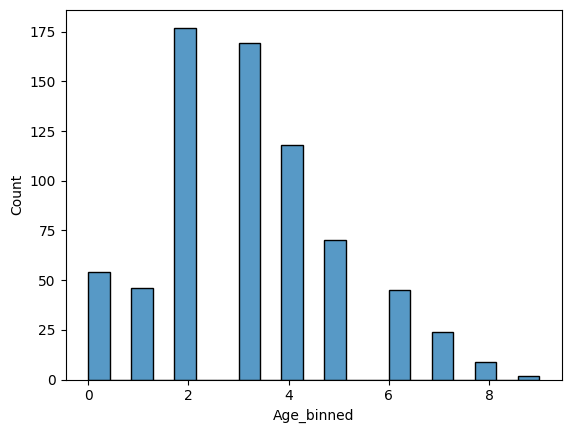

In [113]:
for col in numeric_data:
    df2[f'{col}_binned'] = pd.cut(df[col], bins=10, labels=False, include_lowest=True)

sns.histplot(df2.Age_binned)

In [121]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load dataset
X = df2[['Age','Fare']]
y = df2[['Sex']]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

# Train classifier
clf = RandomForestClassifier().fit(X_train, y_train)

# Predict & evaluate
print("Accuracy:", accuracy_score(y_test, clf.predict(X_test)))

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.6759776536312849


Silhouette Score: 0.36903940184636264


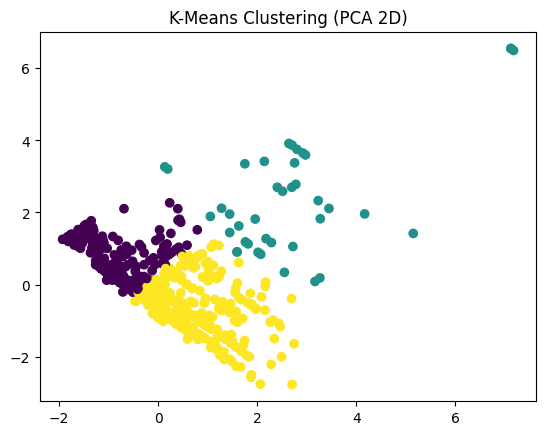

In [123]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Load and scale data
X = StandardScaler().fit_transform(df2[['Age',"Fare"]])

# Cluster
kmeans = KMeans(n_clusters=3, random_state=42).fit(X)
print("Silhouette Score:", silhouette_score(X, kmeans.labels_))

# Reduce to 2D for plotting
X_pca = PCA(2).fit_transform(X)

# Visualize
plt.scatter(X_pca[:,0], X_pca[:,1], c=kmeans.labels_, cmap='viridis')
plt.title("K-Means Clustering (PCA 2D)")
plt.show()


R² Score: 0.14716390188107165


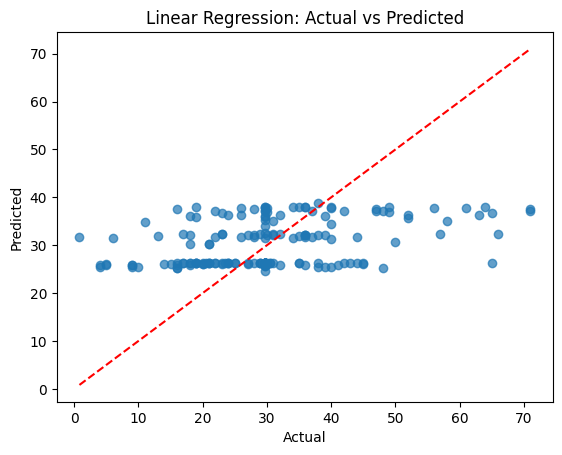

In [125]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Load and split data
X = df2[['Pclass','Fare']]
y = df2[['Age']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler().fit(X_train)
X_train, X_test = scaler.transform(X_train), scaler.transform(X_test)

# Train regression model
reg = LinearRegression().fit(X_train, y_train)

# Predict and evaluate
y_pred = reg.predict(X_test)
print("R² Score:", r2_score(y_test, y_pred))

# Visualize (predicted vs actual)
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Linear Regression: Actual vs Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()


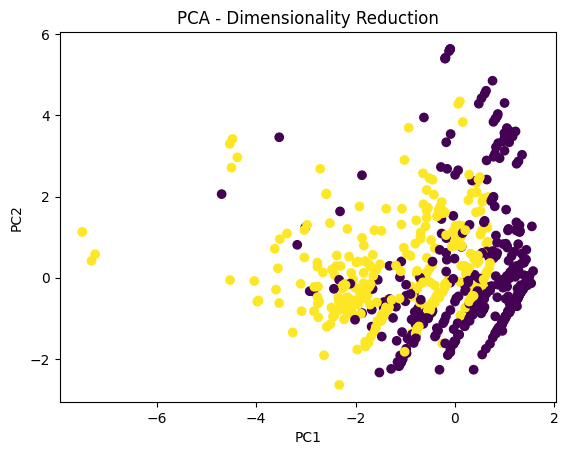

In [145]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Select numeric columns
X = numeric_data.dropna()  # drop NaN values if any

# Scale and apply PCA
X_scaled = StandardScaler().fit_transform(X)
X_pca = PCA(4).fit_transform(X_scaled)

# Visualize (no target column since it's unsupervised)
plt.scatter(X_pca[:,0], X_pca[:,1], c=df2.loc[X.index, 'Survived'], cmap='viridis')
plt.xlabel('PC1'); plt.ylabel('PC2')
plt.title('PCA - Dimensionality Reduction')
plt.show()


In [2]:
!pip install pygit2

   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   ---------------------------------------- 1.2/1.2 MB 11.5 MB/s  0:00:00



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
from pygit2 import clone_repository
clone_repository("https://github.com/Codewithharsh1326/QR-Code-Generator","D:/Nirma/B. Tech - III/DAV/Code/QR-Code_Generator")

pygit2.Repository('D:/Nirma/B. Tech - III/DAV/Code/QR-Code_Generator/.git/')